In [75]:
from discopy.frobenius import *
from discopy import python
example = """3   4
4   3
2   5
1   3
3   9
3   3"""
x = Ty('x')
splitlines = Box('splitlines', x, x)
_sorted = Box('sorted', x, x)
split = Box('split', x, x @ x)
add = Box('add', x @ x, x)
similarity = Box('similarity', x @ x, x)
F = Functor(
    lambda ob: ob,
    {
        splitlines: lambda a: a.splitlines(),
        split: lambda a: (
            [int(x.split()[0]) for x in a],
            [int(x.split()[1]) for x in a], ),
        _sorted: lambda a: (sorted(a), ),
        add: lambda a, b: sum(
            abs(x-y) for x, y in zip(a, b)),
        similarity: lambda a, b: sum(
            x for y in b for x in a if x==y),
    },
    cod=Category(python.Ty, python.Function))
two_columns = splitlines >> split

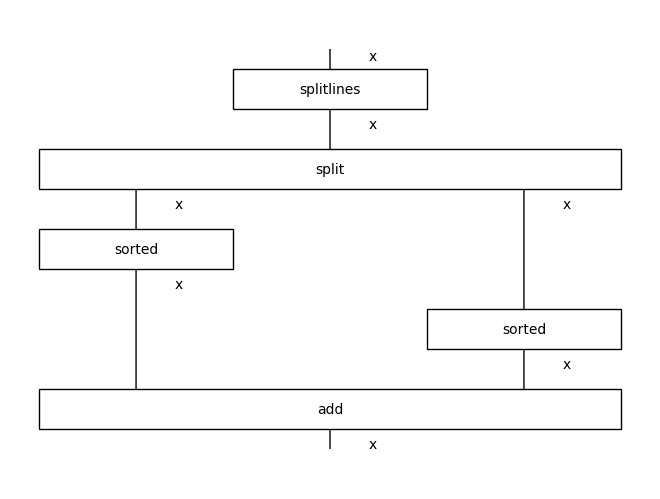

In [76]:
f1 = two_columns >> (_sorted @ _sorted) >> add
f1.draw()
assert F(f1)(example) == 11

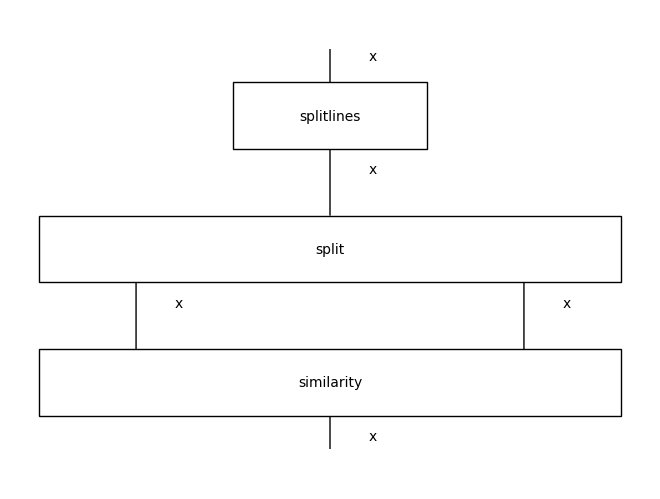

In [77]:
f2 = two_columns >> similarity
f2.draw()
assert F(f2)(example) == 31